In [2]:
# Import the modules
import json
import random

# Define the possible tags
tags = ["sports", "music", "art", "science", "politics"]

# Define the number of dictionaries to create
n = 10

# Create an empty list for test_data
test_data = []

# Create an empty list for pred_data
pred_data = []

# Loop over the range of n
for i in range(n):
    # Generate a random id
    id = random.randint(1000, 9999)
    
    # Generate a random text
    text = f"This is a sample text for id {id}"
    
    # Generate a random number of tags
    k = random.randint(1, len(tags))
    
    # Sample k tags from the tags list
    sample_tags = random.sample(tags, k)
    
    # Create a dictionary with id, text, and tags
    d = {"id": id, "text": text, "tags": sample_tags}
    
    # Append the dictionary to test_data
    test_data.append(d)
    
    # Create a copy of the dictionary
    d_copy = d.copy()
    
    # Generate a random number of predicted tags
    m = random.randint(1, len(tags))
    
    # Sample m tags from the tags list
    pred_tags = random.sample(tags, m)
    
    # Replace the tags with pred_tags in the copy
    d_copy["tags"] = pred_tags
    
    # Append the copy to pred_data
    pred_data.append(d_copy)

# Save test_data and pred_data as JSON files
with open("test_data.json", "w") as f:
    json.dump(test_data, f, indent=4)
    
with open("pred_data.json", "w") as g:
    json.dump(pred_data, g, indent=4)


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

# Extract the correct and predicted tags as lists
y_true = [d['tags'] for d in test_data]
y_pred = [d['tags'] for d in pred_data]

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the y_true and y_pred to a binary matrix representation
y_true_bin = mlb.fit_transform(y_true)
y_pred_bin = mlb.transform(y_pred)

# Now you can calculate the metrics
accuracy = accuracy_score(y_true_bin, y_pred_bin)
precision = precision_score(y_true_bin, y_pred_bin, average='samples')
recall = recall_score(y_true_bin, y_pred_bin, average='samples')
f1 = f1_score(y_true_bin, y_pred_bin, average='samples')

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

# Confusion matrix for multi-label classification isn't straightforward, you might want to consider per-class breakdown

Accuracy: 0.1
Precision: 0.6833333333333333
Recall: 0.5900000000000001
F1 score: 0.535952380952381


In [7]:
from sklearn.metrics import classification_report

# Calculate metrics for each label
for label in range(len(mlb.classes_)):
    print(f"Class: {mlb.classes_[label]}")
    print(classification_report(y_true_bin[:, label], y_pred_bin[:, label]))


Class: art
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.71      0.71      0.71         7

    accuracy                           0.60        10
   macro avg       0.52      0.52      0.52        10
weighted avg       0.60      0.60      0.60        10

Class: music
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.40      0.40      0.40         5

    accuracy                           0.40        10
   macro avg       0.40      0.40      0.40        10
weighted avg       0.40      0.40      0.40        10

Class: politics
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.67      0.67      0.67         6

    accuracy                           0.60        10
   macro avg       0.58      0.58      0.58        10
weighted avg       0.60      0.60 

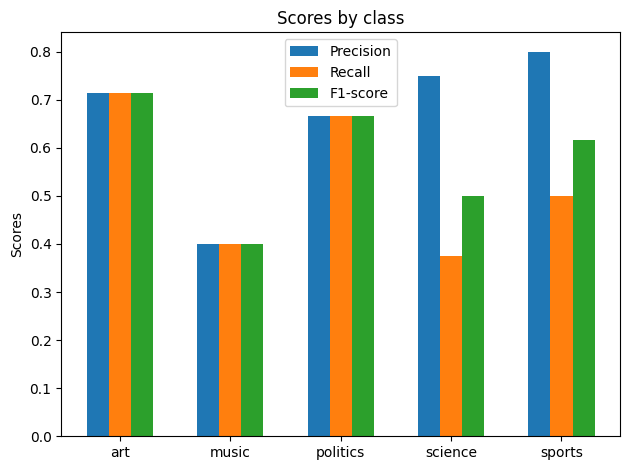

In [8]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Calculate metrics for each label
precision, recall, f1, _ = precision_recall_fscore_support(y_true_bin, y_pred_bin, average=None)

# Create a bar plot for each metric
labels = mlb.classes_
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, precision, 0.2, label='Precision')
rects2 = ax.bar(x, recall, 0.2, label='Recall')
rects3 = ax.bar(x + 0.2, f1, 0.2, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()